# NAIVE BAYES
Results: we tested several models with different parameters and K-Fold-Cross validation. The differences between the performances were small, but the best model had an ROC_AUC of 74% and an accuracy of 99%.

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [17]:
data_train = pd.read_csv('training_processed.csv')
data_valid = pd.read_csv('validation_processed.csv')

labels_train = data_train['ACTIVE']# ground truth labels
features_train = data_train.drop(['ACTIVE'], axis=1) 
labels_valid = data_valid['ACTIVE']# ground truth labels
features_valid = data_valid.drop(['ACTIVE'], axis=1)

In [18]:
naive_bayes = GaussianNB()

naive_bayes_parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}
cross_val = KFold(n_splits=5)
naive_bayes_grid_search = GridSearchCV(estimator=naive_bayes, param_grid=naive_bayes_parameters, cv=cross_val, scoring=['roc_auc','accuracy'], refit='roc_auc')
naive_bayes_grid_result = naive_bayes_grid_search.fit(features_train, labels_train)
# summarize results
print("Best: %f using %s" % (naive_bayes_grid_result.best_score_, naive_bayes_grid_result.best_params_))
print("Average AUC for Naive Bayes: ", np.mean(naive_bayes_grid_result.cv_results_['mean_test_roc_auc']))
print("Average Accuracy for Naive Bayes: ", np.mean(naive_bayes_grid_result.cv_results_['mean_test_accuracy']))

Best: 0.741708 using {'var_smoothing': 0.1}
Average AUC for Naive Bayes:  0.7335115983401475
Average Accuracy for Naive Bayes:  0.967361050561411


In [19]:
results = pd.DataFrame(naive_bayes_grid_result.cv_results_)

[Text(0.5, 1.0, 'ROC_AUC of Naive Bayes with K-Fold-Cross Validation\n')]

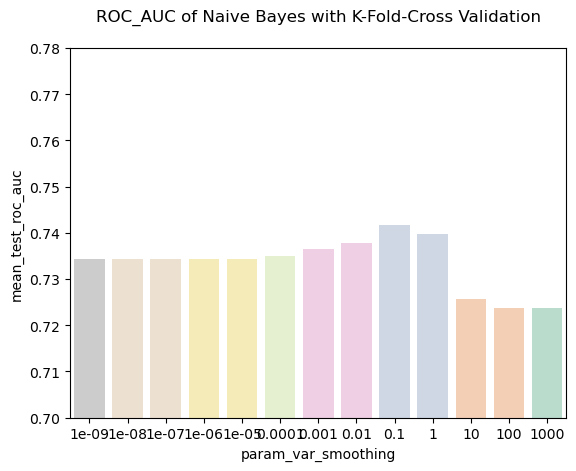

In [20]:
plot = sns.barplot(data=results, x='param_var_smoothing', y='mean_test_roc_auc', palette='Pastel2_r')
plot.set(ylim=(0.7, 0.78))
plot.set(title='ROC_AUC of Naive Bayes with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of Naive Bayes with K-Fold-Cross Validation\n')]

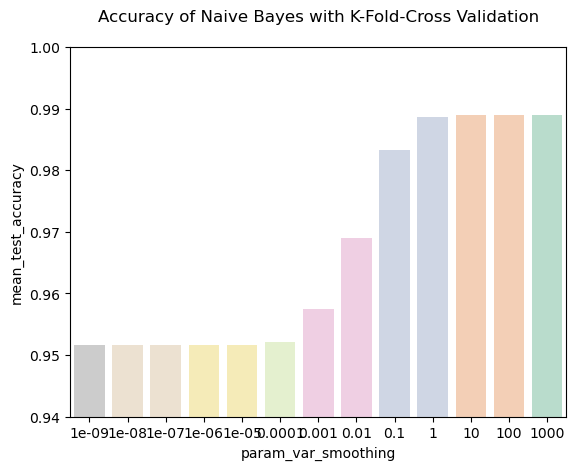

In [21]:
plot = sns.barplot(data=results, x='param_var_smoothing', y='mean_test_accuracy', palette='Pastel2_r')
plot.set(ylim=(0.94, 1))
plot.set(title='Accuracy of Naive Bayes with K-Fold-Cross Validation\n')